In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!pip install pandas scikit-learn numpy

In [ ]:
import pandas as pd

# Cargar los datos
df = pd.read_csv('/content/drive/MyDrive/Trabajo/name_gender_dataset.csv')

# Verificar los primeros registros
print(df.head())

      Name Gender    Count  Probability
0    James      M  5304407     0.014517
1     John      M  5260831     0.014398
2   Robert      M  4970386     0.013603
3  Michael      M  4579950     0.012534
4  William      M  4226608     0.011567


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Convertir nombres en características numéricas
vectorizer = CountVectorizer(analyzer='char', ngram_range=(1, 3))
X = vectorizer.fit_transform(df['Name'])

# Convertir las etiquetas (géneros) en valores numéricos
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(df['Gender'])


In [ ]:
#Dividir datos de entrenamiento y prueba

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
#Realizar entrenamiento del modelo

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred, target_names=le.classes_))


Accuracy: 0.8069192639369865
              precision    recall  f1-score   support

           F       0.84      0.85      0.84     18029
           M       0.76      0.74      0.75     11425

    accuracy                           0.81     29454
   macro avg       0.80      0.79      0.80     29454
weighted avg       0.81      0.81      0.81     29454



In [ ]:
import chardet

ruta_archivo = '/content/drive/MyDrive/Trabajo/nombres.csv'

# Función para detectar la codificación
def detectar_codificacion(ruta_archivo):
    with open(ruta_archivo, 'rb') as f:
        resultado = chardet.detect(f.read())
    return resultado['encoding']

# Detectar la codificación
codificacion = detectar_codificacion(ruta_archivo)

# Leer el archivo con la codificación detectada, especificando dtype para ID_CUENTA
df1 = pd.read_csv(ruta_archivo, delimiter=';', encoding=codificacion, na_values=['NA'], on_bad_lines='warn', dtype={'ID_CUENTA': str})

print(df1.head())

      NOMBRE TIPO_DE_DOCUMENTO NÚMERO_DE_DOCUMENTO  PLAN_TECNICO  \
0  CEBASTIAN                CC            14894498          25.0   
1    MARICEL                CC            66821416          25.0   
2     ROBERT                CC          1144209282          25.0   
3      DIANA                CC          1116443720          25.0   
4      DIANA                CC          1130629051          25.0   

             MUNICIPIO  
0  GUADALAJARA DE BUGA  
1           CANDELARIA  
2              PALMIRA  
3               ZARZAL  
4           CANDELARIA  


In [ ]:
#Vectorizar los nombres de df1
df1['NOMBRE'] = df1['NOMBRE'].fillna('')  # Remaplzar NaN por campos vacios

# Transformar nombres
X_new = vectorizer.transform(df1['NOMBRE'])

# Predecir generos
y_pred_new = model.predict(X_new)

# Convertir predición numerica a genero
y_pred_labels = le.inverse_transform(y_pred_new)

# Agregar columna con la predección realizada
df1['Genero_Predicho'] = y_pred_labels

print(df1.head())


      NOMBRE TIPO_DE_DOCUMENTO NÚMERO_DE_DOCUMENTO  PLAN_TECNICO  \
0  CEBASTIAN                CC            14894498          25.0   
1    MARICEL                CC            66821416          25.0   
2     ROBERT                CC          1144209282          25.0   
3      DIANA                CC          1116443720          25.0   
4      DIANA                CC          1130629051          25.0   

             MUNICIPIO Genero_Predicho  
0  GUADALAJARA DE BUGA               M  
1           CANDELARIA               F  
2              PALMIRA               M  
3               ZARZAL               F  
4           CANDELARIA               F  


In [ ]:
import pandas as pd
from collections import Counter

# Contar las predicciones
conteo_predicciones = Counter(df1['Genero_Predicho'])

# Crear un DataFrame a partir del conteo
df_conteo = pd.DataFrame.from_dict(conteo_predicciones, orient='index', columns=['Conteo'])

# Calcular la exactitud general del modelo
exactitud_general = accuracy_score(y_test, y_pred)

# Agregar la exactitud general al DataFrame
df_conteo.loc['Exactitud General'] = exactitud_general

# Mostrar el DataFrame
print(df_conteo)


                         Conteo
M                  46831.000000
F                  52175.000000
Exactitud General      0.806919


In [ ]:
import joblib

joblib.dump(model, 'Gender_Predictor.pkl')
joblib.dump(vectorizer, 'vectorizer.pkl')
joblib.dump(le, 'label_encoder.pkl')

['label_encoder.pkl']

In [ ]:
# Contar planes tecnicos
conteo_planes = df1['PLAN_TECNICO'].value_counts()

# Encontrar el plan más utilizado
plan_mas_utilizado = conteo_planes.index[0]
repeticiones = conteo_planes.iloc[0]

print(f"El plan técnico más utilizado es '{plan_mas_utilizado}' con {repeticiones} servicios.")


El plan técnico más utilizado es '200.0' con 49953 servicios.


In [ ]:
# Contar municipios
conteo_municipios = df1['MUNICIPIO'].value_counts()

# Encontrar el municipio más repetido
municipio_mas_repetido = conteo_municipios.index[0]
repeticiones_municipio = conteo_municipios.iloc[0]

print(f"El municipio que más se repite es '{municipio_mas_repetido}' con {repeticiones_municipio} servicios.")


El municipio que más se repite es 'IBAGUÉ' con 21840 servicios.


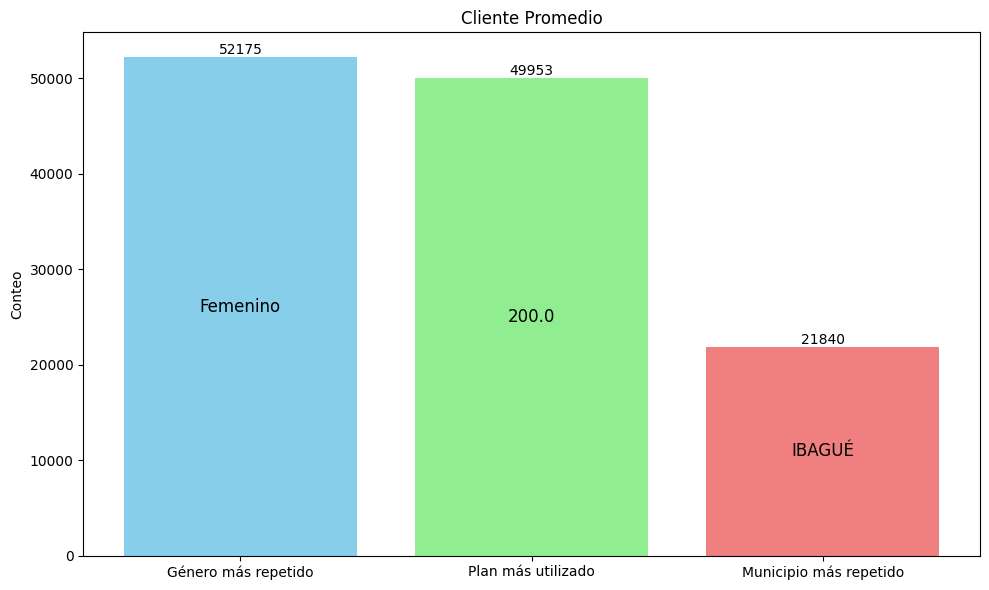

In [ ]:
import matplotlib.pyplot as plt
# Datos para la visualización
genero_mas_repetido = df_conteo.index[1]
conteo_genero = df_conteo.iloc[1, 0]

# Crear la visualización
fig, ax = plt.subplots(figsize=(10, 6))

# Gráfico de barras para el género más repetido
bars = ax.bar(['Género más repetido'], [conteo_genero], color='skyblue')
ax.set_ylabel('Conteo')
ax.set_title('Cliente Promedio')
ax.text(0, conteo_genero // 2, "Femenino", ha='center', va='center', fontsize=12, color='black')

# Agregar conteo encima de la barra
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')

# Gráfico de barras para el plan más utilizado
bars = ax.bar(['Plan más utilizado'], [repeticiones], color='lightgreen')
ax.text(1, repeticiones // 2, plan_mas_utilizado, ha='center', va='center', fontsize=12, color='black')

# Agregar conteo encima de la barra
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')

# Gráfico de barras para el municipio más repetido
bars = ax.bar(['Municipio más repetido'], [repeticiones_municipio], color='lightcoral')
ax.text(2, repeticiones_municipio // 2, municipio_mas_repetido, ha='center', va='center', fontsize=12, color='black')

# Agregar conteo encima de la barra
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')

plt.tight_layout()
plt.show()
